<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 5

#### Ana Nuñez



# Consigna

1) Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

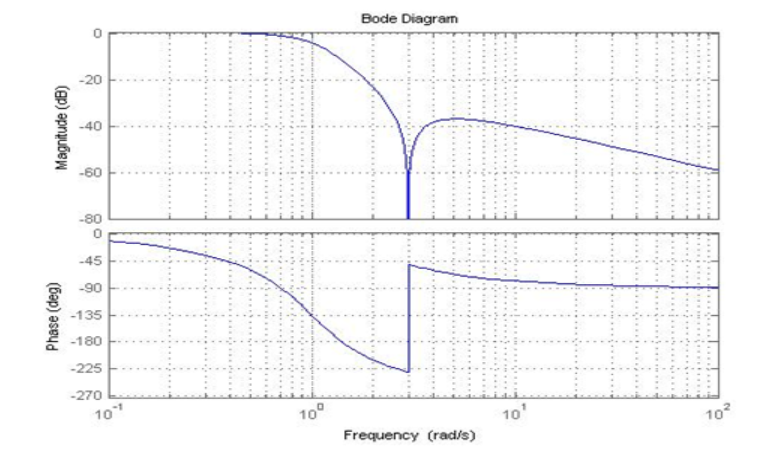

a) Determine la expresión de H(s) del filtro pasa-altos normalizado                    

b) Realizar el diagrama de polos y ceros de H(s)                                             

c)Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

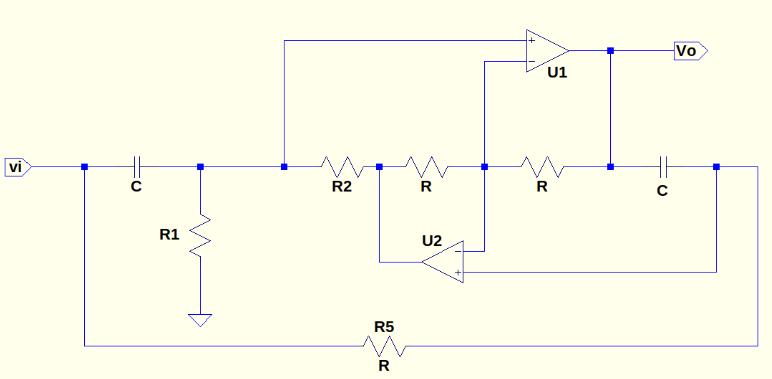

d) Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

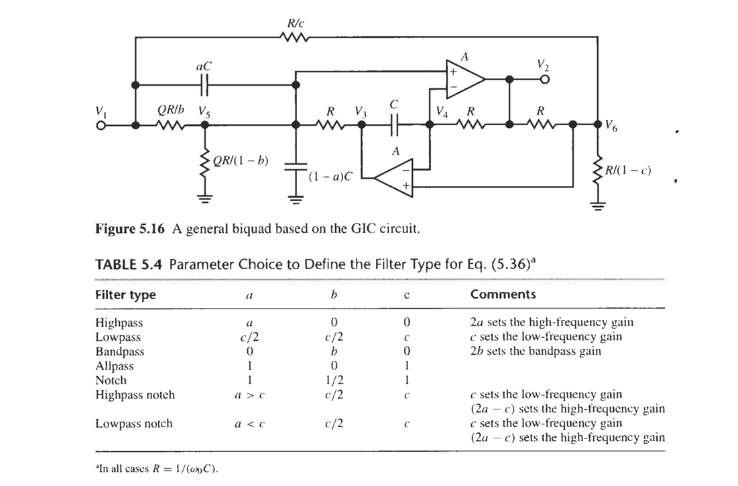


# 1. Desarrollo analítico

A continuacíon se adjuntan el desarrollo analítico del filtro propuesto

In [1]:
from IPython.display import IFrame
IFrame("./TS5.pdf", width=1000, height=1000)

# 2. Simulación numérica circuital

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS


#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías + Inicializacion de gráficos para el Notebook


HLP(s): 


<IPython.core.display.Math object>

HHP(s): 


<IPython.core.display.Math object>

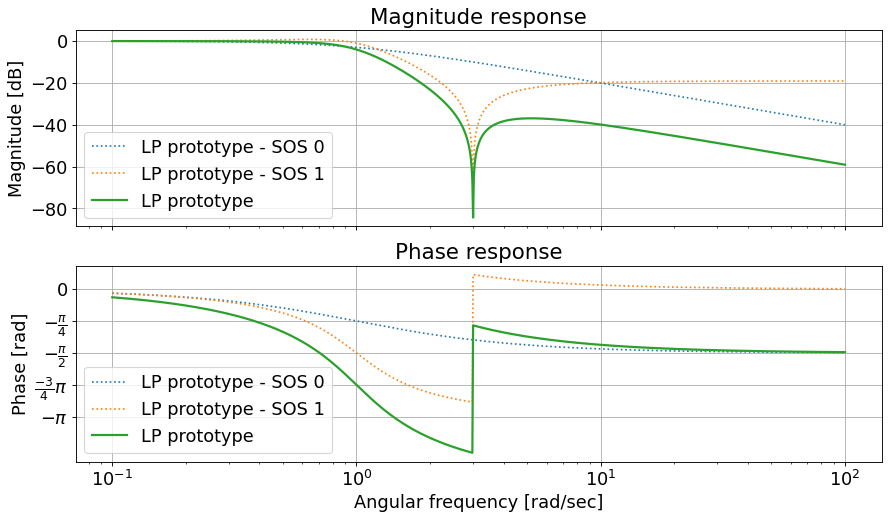

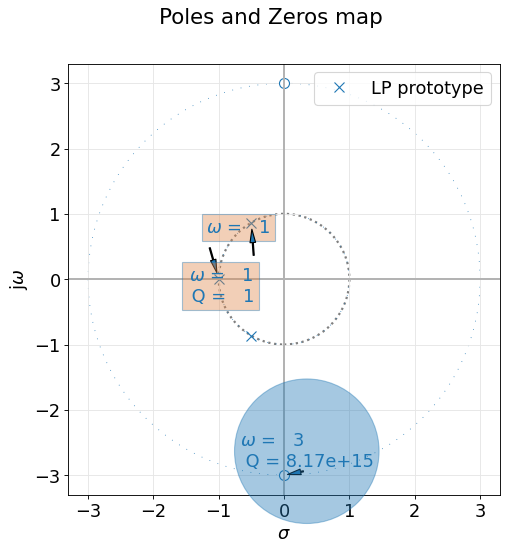

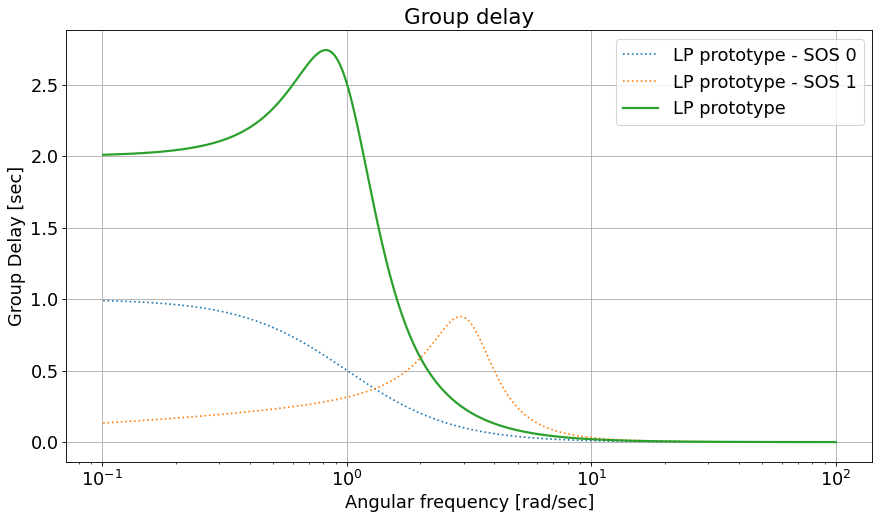

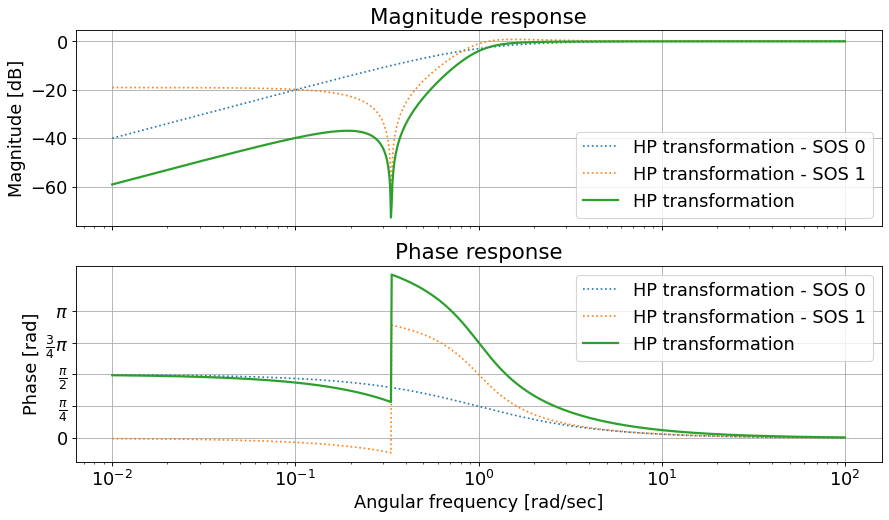

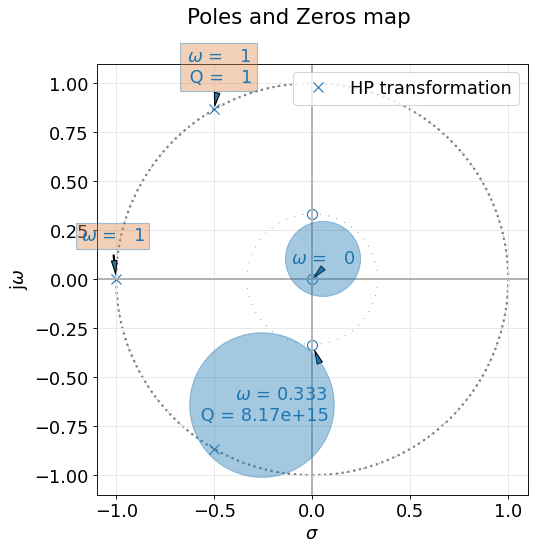

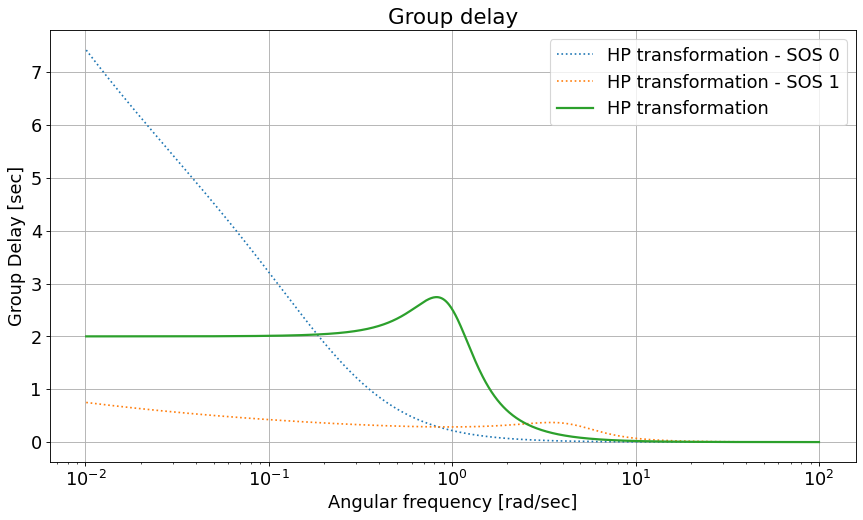

In [4]:


#----------------------Definicion de las variables---------------------
#---- Para el filtro pasa-altos ----
w0 = 1
wze = 1/3

#---- Para el filtro pasa-bajos ----
W0 = 1/w0
Wze = 1/wze

#---- Z P K LP ----
[r1, r2] = np.roots([1, 1, 1])

zLP = [3j, -3j]
pLP = [-1, r1, r2]
kLP = 1/9

#---------------------------Definicion de HLP--------------------------

[numLP, denLP] = ss.zpk2tf(zLP, pLP, kLP)

LP_sos = tf2sos_analog(numLP, denLP)

#-------------------------Transformación LP-HP-------------------------

[numHP, denHP] = ss.lp2hp(numLP, denLP, w0)

[zHP, pHP, kHP] = ss.tf2zpk(numHP, denHP)

HP_sos = tf2sos_analog(numHP, denHP)

#-----------------------------Visualizacion----------------------------

# -------- LP --------
print("HLP(s): ")
LP_sos[LP_sos < 1e-6] = 0.0
pretty_print_SOS(LP_sos, mode='omegayq')
#print("zLP = ", zLP, "\n", "pLP = ", pLP, "\n", "kLP =", kLP)
analyze_sys(LP_sos, "LP prototype")

#print("\n")

# -------- HP --------
print("HHP(s): ")
HP_sos[HP_sos < 1e-6] = 0.0
pretty_print_SOS(HP_sos, mode='omegayq')
analyze_sys(HP_sos, "HP transformation", same_figs=False)

En los graficos resultantes del script de Python se puede observar como se empieza el diseño por un prototipo de maxima planicidad pasabajos y este luego se transforma en el dominio de la frecuencia para lograr el pasaaltos objetivo. Al mismo tiempo se observa como tiene ganancia de -3dB en $\omega_0=1$ normalizada y 0dB en frecuencias mayores. Esto se logra mediante la compensacion de ganancias entre las SOS que componen la transferencia. Tambien se observa que se agrega un único cero en $(\sigma = 0 ; j\omega=0)$.

# 3. Simulación en LTSpice del circuito activo

Se realizó la simulación circuital del filtro

A continuación, se muestran el circuito activo y su transferencia

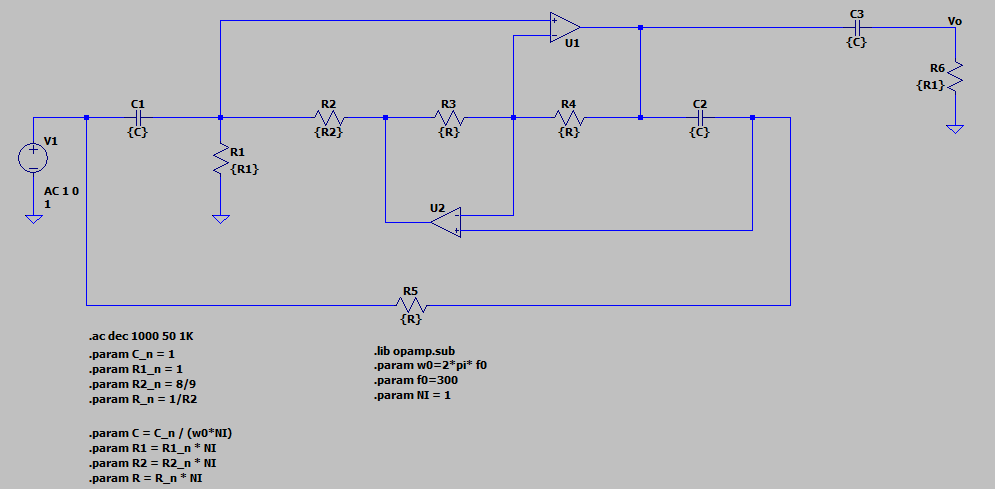

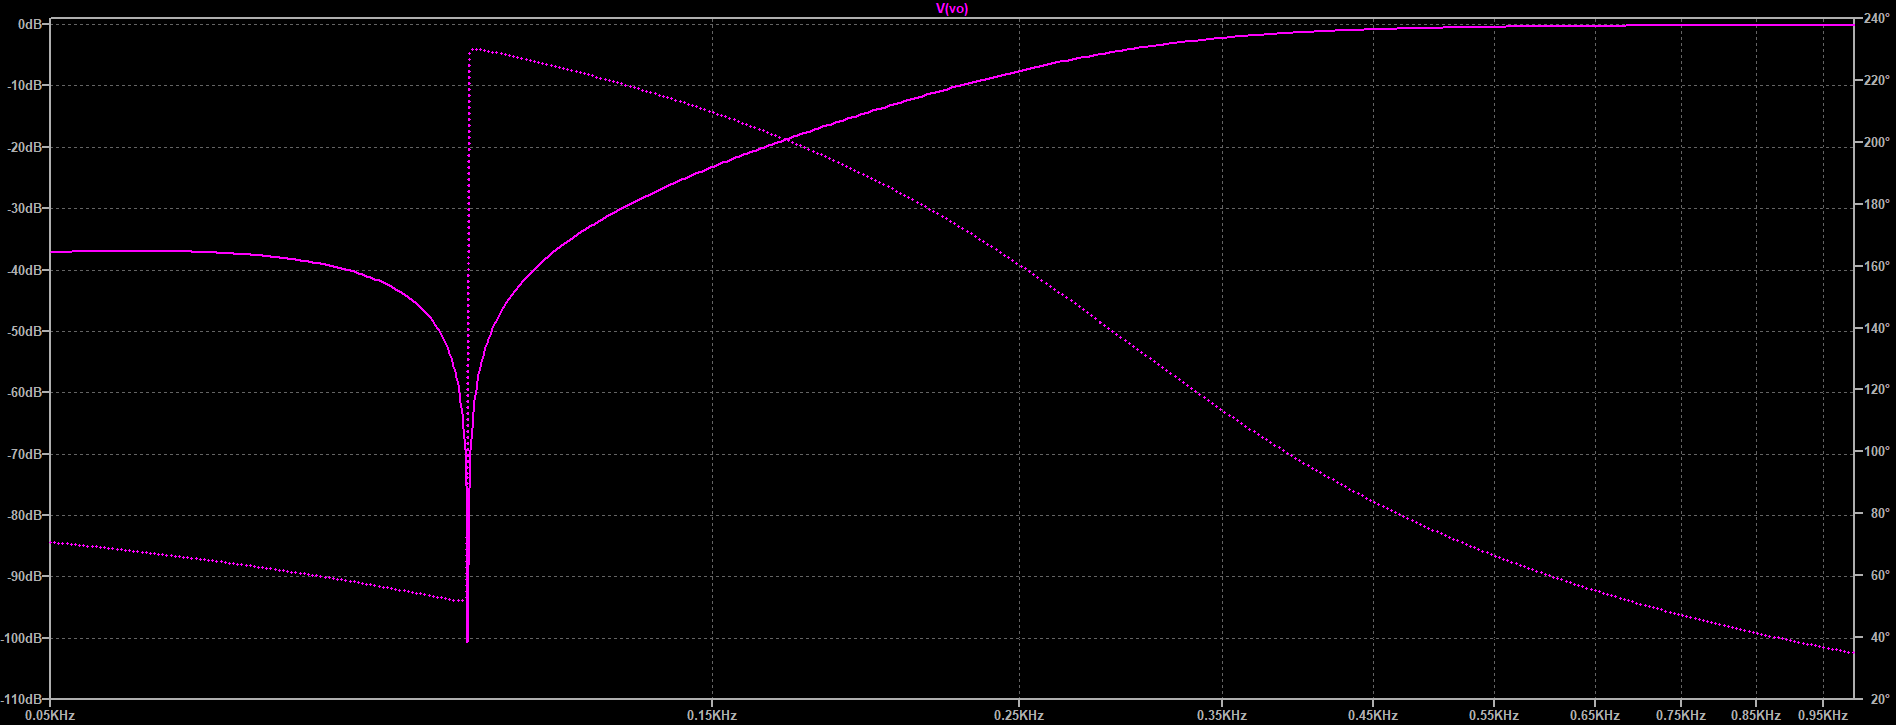

Se le hace zoom a la transferencia para analizar el comportamiento en $\omega_{0}$ y $\omega_{Ze}$, señalizadas con los cursores

$|T(\omega = \omega_{0})| = -4dB$, no verifica que $\alpha_{max} < 3dB$ 

$|T(\omega = \omega_{Ze})| = -100dB$,  verifica que $|T(\omega = \omega_{Ze})| \rightarrow  -\infty$ 

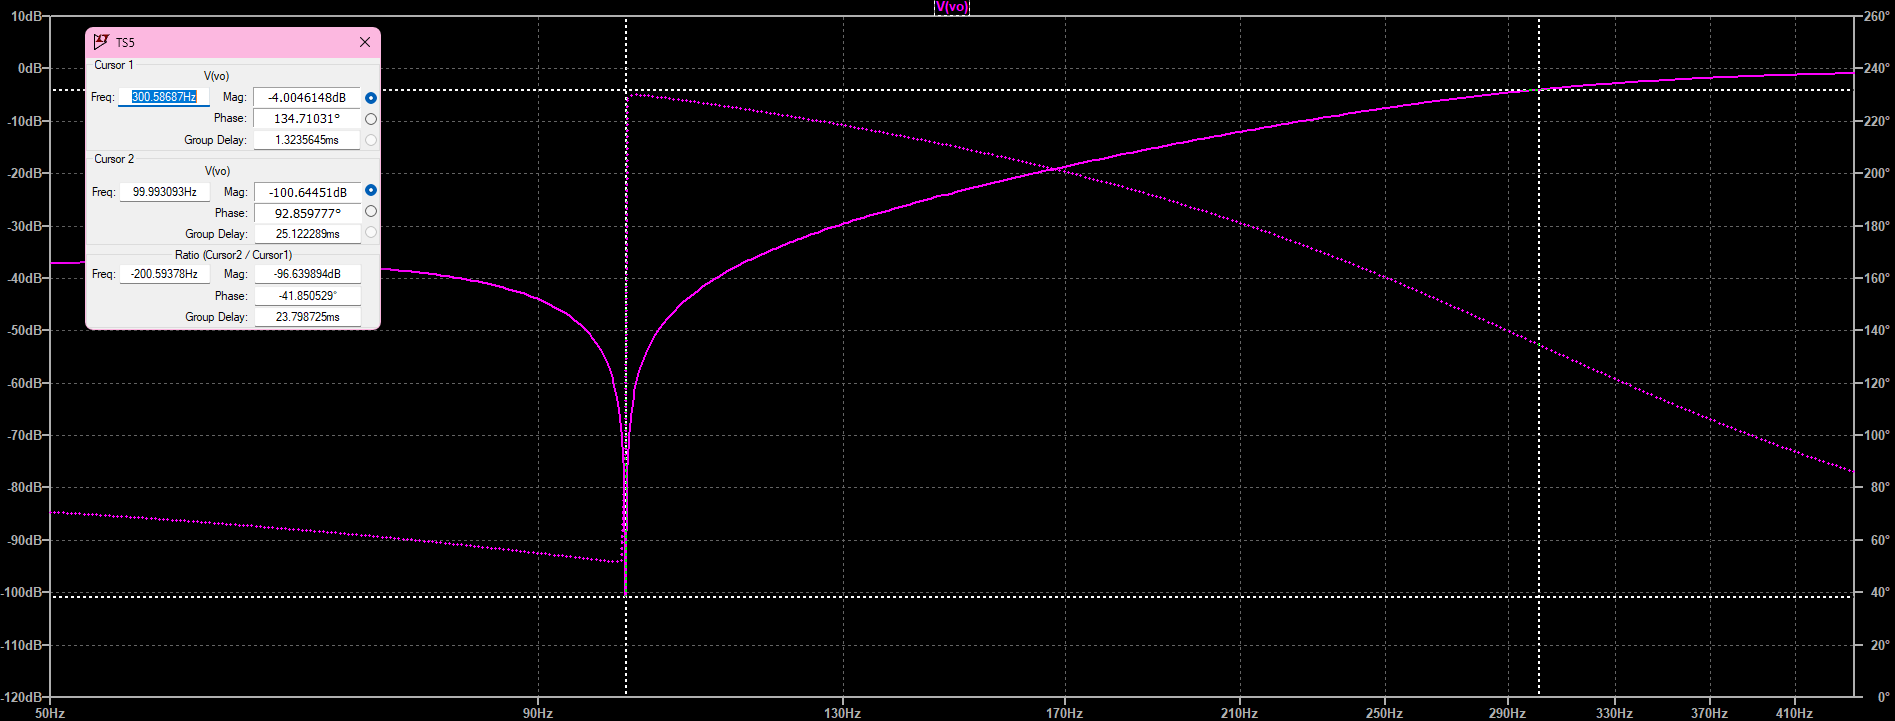




# 4. Conclusiones

- Se verifica la correcta transformación y diseño del filtro
- Se observa que, a pesar de ser de máxima planicidad, no se obtienen -3dB en la frecuencia de corte
- Se observa que, en este caso, el circuito tiene un correcto funcionamiento normalizado, a diferencia del de la TS4 BisBis

## Aprendizaje personal
En un principio, al diseñar el diagrama de polos y ceros del pasa altos, como aún no había sacado su transferencia, asumí 3 ceros en el origen. Sin embargo, a causa de los ceros de transmición, únicamente se agrega un cero en el origen, y al mapear con 1/s, los ceros que previamente estaban por fuera de la circunferencia unitaria, ahora estarán dentro, acentuando la característica pasa altos.